# Logistic regression: interative lecture

The first thing to say is that logistic regression is __not a prediction__, but a **classification** learning
algorithm. The name *logistic regression* comes from statistics and is due to the fact that the mathematical
formulation of logistic regression is similar to that of linear regression.

In logistic regression, we still want to learn the equation of the hyperplane which best describes (fits) the data. Only the **target variable is** not numeric but **categorical**. In the simplest case, each data point belongs to one of two complementary classes: positive (1) and negative (0). 

The classification problem that we are trying to solve: given a vector of (numeric) observations $\mathbf{x}$, predict whether this observation belongs to a given class (1) or not (0).

# 1. Using simple regression for classification
The first idea that comes to mind - to use the usual regression: after all, we can treat class label 0 and 1 as a numeric attribute. Let's see why this idea does not really work.

We start with a dataset that contains only one predictive attribute $\mathbf{x^{(1)}}$ (1D vector), and the categorical target attribute $y$.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create a tiny sample dataset
Data_X = np.array([1.0, 3.5, 4, 5, 6.5, 7.0, 9, 9.5, 13])
Data_Y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1])

X = Data_X.reshape(len(Data_X),1) 
Y = Data_Y.reshape(len(Data_Y),1) 

Treat $y$ as numeric and try a **simple linear regression**:

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression(normalize=True)

regr.fit(X, Y)
print('intercept:', regr.intercept_)
print('slope:', regr.coef_)

intercept: [-0.40600316]
slope: [[0.11374408]]


Let's see if we can use this line to predict the class: 0 or 1.

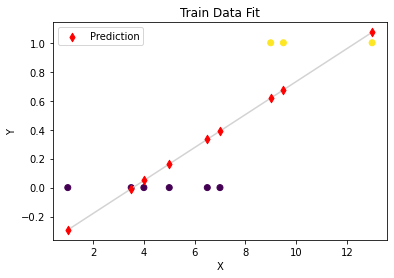

In [20]:
# Plot data points
plt.scatter(X, Y,  c=Y) 
plt.title('Train Data Fit') 
plt.xlabel('X') 
plt.ylabel('Y') 

# Plot regression line 
plt.plot(X, regr.predict(X), color = "lightgrey") 
plt.scatter(X, regr.predict(X), color = "red", marker = "d", zorder=4, label="Prediction") 
plt.legend()
plt.show() 

As we see from the above experiment, the best fitting line does not really help us to predict the value of $y$: the linear combination of features such as $\mathbf{wx} + b$ gives a continuous result
that spans from minus infinity to plus infinity, while $y$ has only two possible values.

We also see that the $SSR$ would not be a good objective function for fitting this line - no matter how you change the line parameters, the SSR will always remain very high.

# 2. Logistic regression in 1D
The idea behind the logistic regression is to map an output of a continuous function to a binary result. 
If we set one class 
label to 0 and the second class label to 1, we just need to find a simple continuous
function whose codomain is (0, 1). In such a case, if the value returned by the model for
input $\mathbf{x}$ is closer to 0, then we output a class label 0, otherwise, the example is labeled
as 1.

One function that has such a property is the *standard logistic function* (also
known as the <b>sigmoid</b> function)
<img src="images/sigmoid.png" width="400px">

Below we implement the mapping from $x$ to $y$ using line equation $y = ax + b$, and the sigmoid function which will convert the continuous value of $y$ into a float in (0,1) interval.

In [45]:
def line(a, b, x):
    return a*x + b

def sigmoid(y):    
    s = 1 / (1 + np.exp(-y)) 
    return s

def y_from_sigmoid(s):   
    y = - np.log(1.0/s - 1)
    return y
    
def x_from_y(a, b, y):
    return (y - b)/a

In [46]:
# Example
# here is the range with step 0.2
x_range = np.arange(1., 10., 0.2)

# here are the parameters of the line
a=2
b=-10

s = sigmoid(line(a,b,5))
print(s)

y = y_from_sigmoid(s)
print(y)

x = x_from_y(a, b, y)
print(x)

0.5
-0.0
5.0


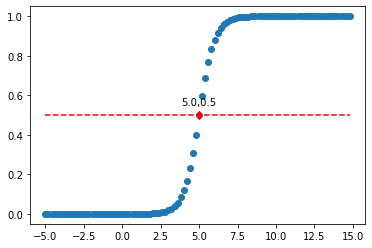

In [58]:
# here are the parameters of the line
a=2
b=-10

# plotting the mapping from x to sigmoid(f(x))
S = sigmoid(line(a,b,x_range))
plt.scatter(x_range, S)

plt.plot(x_range,[0.5]*len(x_range), color="red", linestyle='dashed')

# find the value of x which gives sigmoid 0.5
y = y_from_sigmoid(0.5)
x = x_from_y(a, b, y)
plt.scatter([x], [0.5], marker="d", color="red")
label = "{:.1f},0.5".format(x)
plt.annotate(label, (x,0.5), textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
plt.show()

If we take an output of the linear model and feed it into a sigmoid function, then we get a number between 0 and 1. Sigmoid function gives us a probability that the point belongs to class 1.

If we determined that $a$ and $b$ parameters of the best line are as above, then all the values of $x$ starting with approximately 6.5 would be classified as class 1 with the probability close to 1.0. All the values of $x$ smaller than 3.5 do not belong to class 1 - their sigmoid is close to 0.

For other values of $x$ the probability of belonging or not belonging to class 1 can be found from the above sigmoid function.

The value of $x$ which corresponds to the probability 0.5 is called a **decision boundary** - it divides all the points in the dataset into 2 classes - 1 and 0.

Play with the parameters of the line and see how the decision boundary changes.

## 2.1. Linear Regression with Sigmoid
Let's now see how do we use the sigmoid transformation for classification on the same sample toy 1D dataset as in Section 1.

Maybe we just need to find the best fitting line and transform it into a sigmoid line?

In [49]:
#repeating the dataset here 
Data_X = np.array([1.0, 3.5, 4, 5, 6.5, 7.0, 9, 9.5, 13])
Data_Y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1])

X = Data_X.reshape(len(Data_X),1) 
Y = Data_Y.reshape(len(Data_Y),1) 

slope: 0.11374407582938391 , intercept: -0.40600315955766214


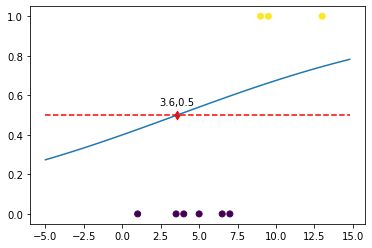

In [55]:
regr = linear_model.LinearRegression(normalize=True)

regr.fit(X, Y)

a = regr.coef_[0][0]
b = regr.intercept_[0]
print("slope:",a,", intercept:",b)

# draw sigmoid predictor
#create continuous interval of x values
x_range = np.arange(-5, 15, 0.2)

S = sigmoid(line(a,b,x_range))

plt.plot(x_range, S)
plt.scatter(X,Y,c=Y)
plt.plot(x_range,[0.5]*len(x_range), color="red", linestyle='dashed')
# find the value of x which gives sigmoid 0.5 - decision boundary
y = y_from_sigmoid(0.5)
x = x_from_y(a, b, y)

plt.scatter([x], [0.5], marker="d", color="red")

label = "{:.1f},0.5".format(x)
plt.annotate(label, (x,0.5), textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
plt.show()

What is the decision boundary? How many points are classified as positive using this decision boundary? 

Answer: the decision boundary is at 3.6. 7 points are classified as positive.

## 2.2. Proper Logistic Regression

The goal of the Logistic Regression learning algorithm is to find the function which best predicts the classes of the data points in the training set. 
Given (currently unknown) parameters of the line $a$ and $b$, the predicted value $p_i$ for each datapoint looks like this:

$p_i = sigmoid(ax_i +b)$

Recall that $p_i$ reflects the probability of the point belonging to class 1. Thus (1 - $p_i$) is the probability of the point not belonging to class 1. 

The objective function should reflect the difference between $p_i$ and the actual class label $y_i$.

The probability for each point $(x_i,y_i)$ to be classified correctly:

$E(x_i) = p_i^{y_i} * (1-p_i)^{(1-y_i)}$

The **objective function of logistic regression** is called *likelihood*. It reflects the probability of observing these data points given the parameters $a$ and $b$. The likelihood of the model given data is just the product of all the probabilities $E(x_i)$:

$$L(a,b|data) = \Pi_{i=1}^n{ E(x_i)}$$

The algorithm which finds the best values of $a$ and $b$ is called the **Maximum Likelihood Estimation (MLE)**. It is an iterative algorithm based on gradient descent! The sigmoid function has a nice derivative (can you calculate it with respect to a and with respect to b?).

This time we are looking to **maximize** the likelihood. So if the derivative of function $L(b)$ is positive for some value of $b$ - we make next step in the same direction. As always we are using the learning rate $\eta$ to make small moves, and we also set the maximum number of iterations (learning epochs). 

In practice - because the product of probabilities for multiple points can become really small and cause underflow - we use **log likelihood** and try to maximize it.

slope: 1.1314087561597346 , intercept: -9.119086257132272


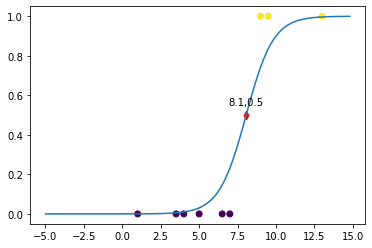

In [60]:
# Using logistic regression learning algorithm
# Fit (train) the Logistic Regression classifier
logregr = linear_model.LogisticRegression()

# note that while in regular regression Y can be multi-dimensional, 
# in logistic regression it has to be a 1D vector
fitted_model = logregr.fit(X, Data_Y)
a = logregr.coef_[0][0]
b = logregr.intercept_[0]

print("slope:",a,", intercept:",b)

# draw sigmoid predictor
#create constinuous interval of x values
x_range = np.arange(-5, 15, 0.2)

S = sigmoid(line(a,b,x_range))


plt.plot(x_range, S)
plt.scatter(X,Y,c=Y)

# find the value of x which gives sigmoid 0.5 - decision boundary
y = y_from_sigmoid(0.5)
x = x_from_y(a, b, y)

plt.scatter([x], [0.5], marker="d", color="red")

label = "{:.1f},0.5".format(x)
plt.annotate(label, (x,0.5), textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.show()

# 3. Logistic regression in 2D

For the 2-dimensional vector **x** we are looking for a hyperplane:

$y = w_1*x^{(1)} + w_2*x^{(2)}+ w_0$

And the predicted value becomes:

$p_i = \frac{1}{1 + e^{-y(x_i^{(1)},x_i^{(2)})}}$

Note that as in the case of regression, we do not have to use the linear combination of original features, but may also use polynomials. 

The sample input dataset is taken from Conway & Myles Machine Learning for Hackers book, Chapter 2.

Each sample contains three columns.
* Height in inches
* Weight in pounds
* Gender: 1 corresponds to a male person, and 0 corresponds to a female person.

We want to learn the model which given height and weight would predict a class label: male (1) or female (0).

In [61]:
 data_file = "height_weight_gender.csv"

In [62]:
import pandas as pd

data = pd.read_csv(data_file)
data.columns

Index(['Height', 'Weight', 'Gender'], dtype='object')

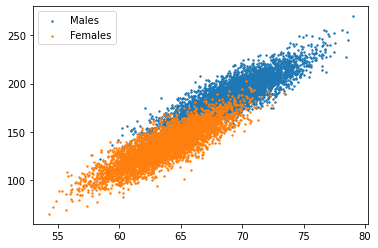

In [63]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
# y = target value, class, last column of the data frame
Y = data.iloc[:, -1]

# all males
males = data.loc[Y == 1]

# all females
females = data.loc[Y == 0]

import matplotlib.pyplot as plt
%matplotlib inline

# plot
plt.scatter(males.iloc[:, 0], males.iloc[:, 1], s=2, label='Males')
plt.scatter(females.iloc[:, 0], females.iloc[:, 1], s=2, label='Females')
plt.legend()
plt.show()

In [64]:
from sklearn import linear_model

# Fit (train) the Logistic Regression classifier
logregr = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
fitted_model = logregr.fit(X, Y)

# Predict
prediction_result = logregr.predict([(70,180)]) #174 cm, 82 kg
print(prediction_result)

[1]


In [65]:
print( "intercept:", logregr.intercept_ )
print( "slopes:", logregr.coef_ )

intercept: [0.69254177]
slopes: [[-0.49261999  0.19834042]]


In [66]:
x1 = 70
x2 = 180

y_predict = logregr.coef_ [0][0]*x1 + logregr.coef_ [0][1]*x2 + logregr.intercept_
print(y_predict)

[1.91041783]


In [67]:
print(sigmoid(y_predict))

[0.87106608]


As there are two features in our dataset, the linear equation can be represented by
$y = w_1*x_1 + w_2*x_2 + w_0$

or using the parameters learned by logistic regression:
$y = -0.49261999*x_1 + 0.19834042*x_2 + 0.69254177$

The sigmoid function here is 3-dimensional. The decision boundary for it is a projection of the sigmoid into a 2D space ($x_1$, $x_2$).
To find the line that separates males from females we set $y$ to zero and compute the line in coordinates ($x_1$, $x_2$):

$0 = -0.49261999*x_1 + 0.19834042*x_2 + 0.69254177$

$x_2 = \frac{0.49261999*x_1 - 0.69254177}{0.19834042}$

This is the line equation for decision boundary.

In [68]:
min_x1 = X.min()[0]
print(min_x1)

max_x1 = X.max()[0]
print(max_x1)

54.26313333
78.99874235


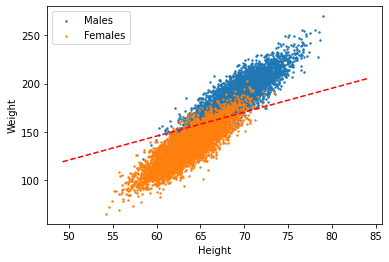

In [69]:
x_values = np.linspace(min_x1 - 5, max_x1 + 5,100)
y_values = (0.49261999*x_values - 0.69254177) / 0.19834042
plt.plot(x_values, y_values, "--r")
plt.scatter(males.iloc[:, 0], males.iloc[:, 1], s=2, label='Males')
plt.scatter(females.iloc[:, 0], females.iloc[:, 1], s=2, label='Females')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

Copyright &copy; 2022 Marina Barsky. All rights reserved.